In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [49]:
# Загружаем данные из pandas
data = pd.read_csv('../csv_file/train.csv')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_13864\1310205317.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449

In [50]:
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [51]:
data.isnull().sum()

report_date        0
client_id          0
target             0
col1           14453
col2           14450
               ...  
col2659        13950
col2660         6420
col2661         6420
col2662         6420
col2663            0
Length: 2666, dtype: int64

In [52]:
threshold = 0.9
print(len(data))
deleate = int(len(data) * (1 - threshold))
df_clean = data.dropna(axis=1,thresh=deleate)
df_clean = df_clean.drop_duplicates(subset=['client_id'])
df_clean

14456


,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,2023-01-01,8294,0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,...,NaN,NaN,NaN,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,0.258007
14431,2022-10-01,4919,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217
14434,2023-02-01,8296,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,0.257217
14446,2022-10-01,8302,0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148


In [53]:
df_clean.shape

(4817, 711)

<Axes: >

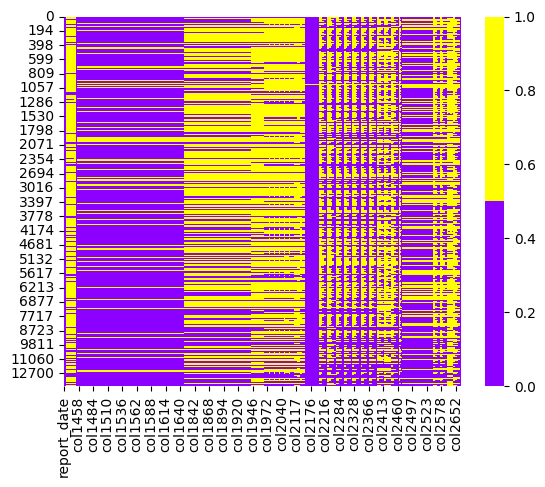

In [54]:
cols = df_clean.columns
#фиолетовые - не пропущенные данные, желтые - пропущенные
colours = ['#8b00ff', '#ffff00']
sns.heatmap(df_clean[cols].isnull(), cmap=sns.color_palette(colours))

In [55]:
missing_percentage = df_clean.isnull().mean() * 100

print("Процент пропусков в каждой колонке:")
print(missing_percentage)

Процент пропусков в каждой колонке:
report_date     0.000000
client_id       0.000000
target          0.000000
col476         83.246834
col480         83.246834
                 ...    
col2656        51.152169
col2660        39.505917
col2661        39.505917
col2662        39.505917
col2663         0.000000
Length: 711, dtype: float64


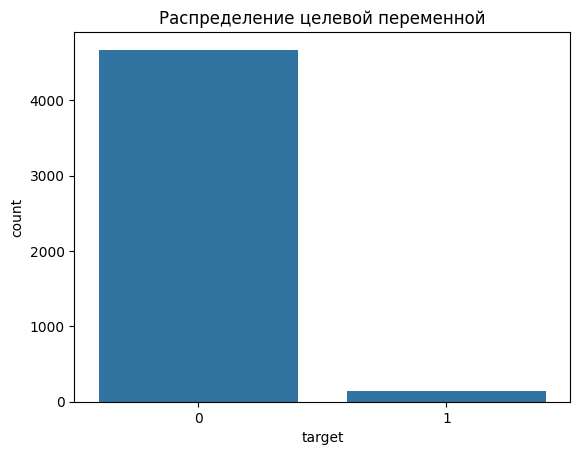

In [56]:
sns.countplot(x='target', data=df_clean)
plt.title('Распределение целевой переменной')
plt.show()

In [57]:
df_clean.head(10)

,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [58]:
df_sorted = data.sort_values(by='col2663', ascending=False)
df_sorted.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
14073,2023-02-01,1150,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
8996,2022-11-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
6389,2022-12-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
790,2022-08-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
564,2023-02-01,843,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338927


In [59]:
object_columns = df_clean.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': ['report_date', 'col520', 'col528', 'col536', 'col544', 'col552', 'col592', 'col600', 'col608', 'col1454']


In [60]:
df_clean = df_clean.drop(columns=['client_id','report_date', 'col520', 'col528', 'col536', 'col544', 'col552', 'col592', 'col600', 'col608', 'col1454'])


In [61]:
object_columns = df_clean.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': []


In [62]:
df_clean = df_clean.fillna(df_clean.mean())

In [63]:
df_clean.head(5000)

,target,col476,col480,col484,col488,col492,col496,col500,col504,col508,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,7.485889e+06,7.414441e+06,7.449978e+06,7.221531e+06,7.125529e+06,7.173377e+06,7.210205e+06,7.087212e+06,7.146978e+06,0.256261
1,0,55.748300,55.748300,55.748299,55.748300,55.748299,37.617100,37.617100,37.617100,37.617100,...,7.485889e+06,7.414441e+06,7.449978e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,0.256261
2,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,7.485889e+06,7.414441e+06,7.449978e+06,7.221531e+06,7.125529e+06,7.173377e+06,7.210205e+06,7.087212e+06,7.146978e+06,0.256261
3,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,7.485889e+06,7.414441e+06,7.449978e+06,7.221531e+06,7.125529e+06,7.173377e+06,7.210205e+06,7.087212e+06,7.146978e+06,0.258682
4,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,7.485889e+06,7.414441e+06,7.449978e+06,7.221531e+06,7.125529e+06,7.173377e+06,7.210205e+06,7.087212e+06,7.146978e+06,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,0,59.898300,59.898300,59.898300,59.898300,59.898300,30.261800,30.261800,30.261801,30.261800,...,7.485889e+06,7.414441e+06,7.449978e+06,6.868510e+06,6.868510e+06,6.868510e+06,6.868510e+06,6.868510e+06,6.868510e+06,0.258007
14431,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,7.485889e+06,7.414441e+06,7.449978e+06,7.221531e+06,7.125529e+06,7.173377e+06,7.210205e+06,7.087212e+06,7.146978e+06,0.257217
14434,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,3.300000e+06,3.300000e+06,3.300000e+06,3.300000e+06,3.300000e+06,3.300000e+06,3.300000e+06,3.300000e+06,3.300000e+06,0.257217
14446,0,59.898300,59.898300,59.898300,59.898300,59.898300,30.261800,30.261800,30.261801,30.261800,...,8.577000e+06,8.577000e+06,8.577000e+06,8.577000e+06,8.577000e+06,8.577000e+06,8.577000e+06,8.577000e+06,8.577000e+06,0.280148


In [64]:
threshold = 0.1


low_corr_columns = df_clean.columns[(df_clean.abs() < threshold).all()]
low_corr_columns_list = low_corr_columns.tolist()
low_corr_columns_list

['col1471',
 'col1479',
 'col1480',
 'col1481',
 'col1482',
 'col1483',
 'col1484',
 'col1485',
 'col1486',
 'col1495',
 'col1519',
 'col1520',
 'col1521',
 'col1522',
 'col1525',
 'col1527',
 'col1528',
 'col1529',
 'col1530',
 'col1531',
 'col1532',
 'col1533',
 'col1534',
 'col1535',
 'col1536',
 'col1537',
 'col1538',
 'col1539',
 'col1540',
 'col1541',
 'col1542',
 'col1543',
 'col1544',
 'col1545',
 'col1546',
 'col1547',
 'col1548',
 'col1549',
 'col1550',
 'col1551',
 'col1552',
 'col1553',
 'col1554',
 'col1555',
 'col1556',
 'col1557',
 'col1558',
 'col1559',
 'col1560',
 'col1561',
 'col1562',
 'col1563',
 'col1564',
 'col1565',
 'col1566',
 'col1567',
 'col1568',
 'col1569',
 'col1570',
 'col1571',
 'col1572',
 'col1573',
 'col1574',
 'col1575',
 'col1576',
 'col1577',
 'col1578',
 'col1579',
 'col1580',
 'col1581',
 'col1582',
 'col1583',
 'col1584',
 'col1585',
 'col1586',
 'col1587',
 'col1588',
 'col1589',
 'col1590',
 'col1591',
 'col1592',
 'col1593',
 'col1594',
 'co

In [65]:
df_clean = df_clean.drop(columns=['col1471',
 'col1479',
 'col1480',
 'col1481',
 'col1482',
 'col1483',
 'col1484',
 'col1485',
 'col1486',
 'col1495',
 'col1519',
 'col1520',
 'col1521',
 'col1522',
 'col1525',
 'col1527',
 'col1528',
 'col1529',
 'col1530',
 'col1531',
 'col1532',
 'col1533',
 'col1534',
 'col1535',
 'col1536',
 'col1537',
 'col1538',
 'col1539',
 'col1540',
 'col1541',
 'col1542',
 'col1543',
 'col1544',
 'col1545',
 'col1546',
 'col1547',
 'col1548',
 'col1549',
 'col1550',
 'col1551',
 'col1552',
 'col1553',
 'col1554',
 'col1555',
 'col1556',
 'col1557',
 'col1558',
 'col1559',
 'col1560',
 'col1561',
 'col1562',
 'col1563',
 'col1564',
 'col1565',
 'col1566',
 'col1567',
 'col1568',
 'col1569',
 'col1570',
 'col1571',
 'col1572',
 'col1573',
 'col1574',
 'col1575',
 'col1576',
 'col1577',
 'col1578',
 'col1579',
 'col1580',
 'col1581',
 'col1582',
 'col1583',
 'col1584',
 'col1585',
 'col1586',
 'col1587',
 'col1588',
 'col1589',
 'col1590',
 'col1591',
 'col1592',
 'col1593',
 'col1594',
 'col1595',
 'col1596',
 'col1597',
 'col1598',
 'col1599',
 'col1600',
 'col1601',
 'col1602',
 'col1603',
 'col1604',
 'col1605',
 'col1606',
 'col1607',
 'col1608',
 'col1609',
 'col1610',
 'col1611',
 'col1612',
 'col1613',
 'col1614',
 'col1615',
 'col1616',
 'col1617',
 'col1618',
 'col1619',
 'col1620',
 'col1621',
 'col1622',
 'col1623',
 'col1624',
 'col1625',
 'col1626',
 'col1627',
 'col1628',
 'col1629',
 'col1630',
 'col1631',
 'col1632',
 'col1633',
 'col1634',
 'col1635',
 'col1636',
 'col1637',
 'col1638',
 'col1639',
 'col1640',
 'col1641',
 'col1642',
 'col1643',
 'col1644',
 'col1645',
 'col1646',
 'col1863',
 'col1871',
 'col1872',
 'col1873',
 'col1874',
 'col1875',
 'col1876',
 'col1877',
 'col1878',
 'col1879',
 'col1880',
 'col1881',
 'col1882',
 'col1883',
 'col1884',
 'col1885',
 'col1886',
 'col1887',
 'col1888',
 'col1889',
 'col1890',
 'col1891',
 'col1892',
 'col1893',
 'col1894',
 'col1911',
 'col1912',
 'col1913',
 'col1914',
 'col1915',
 'col1916',
 'col1917',
 'col1918',
 'col2503',
 'col2504',
 'col2505',
 'col2506',
 'col2507',
 'col2508',
 'col2509',
 'col2510',
 'col2511',
 'col2512',
 'col2513',
 'col2514',
 'col2515',
 'col2516',
 'col2517',
 'col2518',
 'col2519',
 'col2520',
 'col2521',
 'col2522',
 'col2523',
 'col2524',
 'col2525',
 'col2526',
 'col2527',
 'col2528',
 'col2529',
 'col2530',
 'col2531',
 'col2532',
 'col2533',
 'col2534'])

In [66]:
df_clean = df_clean.drop(columns=['col1472',
 'col1473',
 'col1474',
 'col1477',
 'col1496',
 'col1501',
 'col1503',
 'col1511',
 'col1512',
 'col1513',
 'col1514',
 'col1515',
 'col1517',
 'col1523',
 'col1524',
 'col1847',
 'col1903',
 'col1904',
 'col1909'])

In [67]:
df_clean.head()

,target,col476,col480,col484,col488,col492,col496,col500,col504,col508,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,7.485889e+06,7.414441e+06,7.449978e+06,7.221531e+06,7.125529e+06,7.173377e+06,7.210205e+06,7.087212e+06,7.146978e+06,0.256261
1,0,55.748300,55.748300,55.748299,55.748300,55.748299,37.617100,37.617100,37.617100,37.617100,...,7.485889e+06,7.414441e+06,7.449978e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,7.616803e+06,0.256261
2,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,7.485889e+06,7.414441e+06,7.449978e+06,7.221531e+06,7.125529e+06,7.173377e+06,7.210205e+06,7.087212e+06,7.146978e+06,0.256261
3,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,7.485889e+06,7.414441e+06,7.449978e+06,7.221531e+06,7.125529e+06,7.173377e+06,7.210205e+06,7.087212e+06,7.146978e+06,0.258682
4,0,57.589571,55.100558,56.817707,56.942935,57.036979,42.196374,33.024582,38.578465,38.451111,...,7.485889e+06,7.414441e+06,7.449978e+06,7.221531e+06,7.125529e+06,7.173377e+06,7.210205e+06,7.087212e+06,7.146978e+06,0.254164


In [68]:
column_names = df_clean.columns.tolist()
print(column_names)

['target', 'col476', 'col480', 'col484', 'col488', 'col492', 'col496', 'col500', 'col504', 'col508', 'col512', 'col1453', 'col1455', 'col1456', 'col1457', 'col1458', 'col1459', 'col1460', 'col1461', 'col1462', 'col1463', 'col1464', 'col1465', 'col1466', 'col1467', 'col1468', 'col1469', 'col1470', 'col1475', 'col1476', 'col1478', 'col1487', 'col1488', 'col1489', 'col1490', 'col1491', 'col1492', 'col1493', 'col1494', 'col1497', 'col1498', 'col1499', 'col1500', 'col1502', 'col1504', 'col1505', 'col1506', 'col1507', 'col1508', 'col1509', 'col1510', 'col1516', 'col1518', 'col1526', 'col1823', 'col1824', 'col1825', 'col1826', 'col1827', 'col1828', 'col1829', 'col1830', 'col1831', 'col1832', 'col1833', 'col1834', 'col1835', 'col1836', 'col1837', 'col1838', 'col1839', 'col1840', 'col1841', 'col1842', 'col1843', 'col1844', 'col1845', 'col1846', 'col1848', 'col1849', 'col1850', 'col1851', 'col1852', 'col1853', 'col1854', 'col1855', 'col1856', 'col1857', 'col1858', 'col1859', 'col1860', 'col1861'

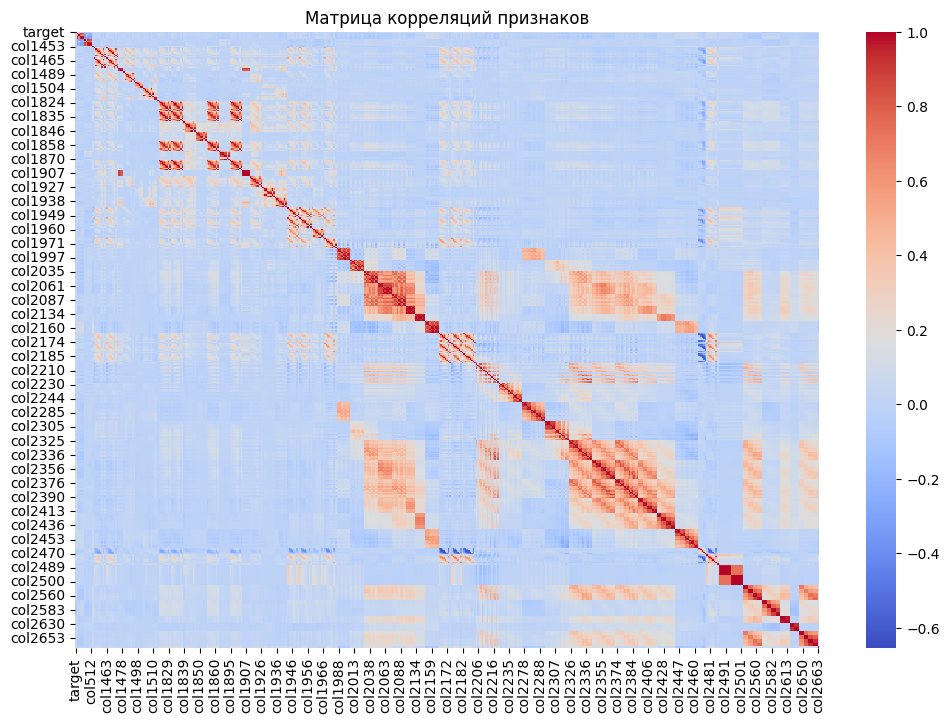

In [69]:
# Анализ корреляций
correlation_matrix = df_clean.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Матрица корреляций признаков')
plt.show()

In [70]:
df_clean.to_csv('train_edit2.csv', index=False)